In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-80.1474001224708 0.7872690317945512
75.81687353799745 88.89871025222487
1.9923895311470403 -114.75496725903649
88.90334435951655 102.90964102009394
-11.31182483258631 -79.34420528219238
-46.17122772710135 27.338881071516823
-11.31821694233956 -80.05832120780849
-27.97039652879848 20.54855770860766
-89.87906798081312 56.80112479826025
15.343618124827401 -1.660180756121349
87.71457039819902 158.18004241430106
87.8009715307127 89.40750102246557
-87.96756618231774 -71.06885675242708
-73.67133022273646 -139.32461317366892
-1.2118247404641806 159.44150601896172
81.49371567684028 -173.1826737720626
-88.62459013672884 -120.4839836562466
50.219338832486415 -30.527955242157077
82.29073108859606 -165.05235109511358
-62.01241338985734 94.1597296534751
-0.5697449756480637 55.67522259596237
60.96812124617517 105.60601843070555
-75.94741471086665 57.89839371534214
23.90864164655001 -144.02347137227252
87.82651918614184 -59.67045645449798
27.33316086664408 52.75791637403364
-72.92966075841132 -63.265

In [31]:
# Import citipy
from citipy import citipy

In [32]:
# # Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [33]:
#Import the requests library
import requests

# Import the API key.
from config import weather_api_key


In [34]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [35]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | paramonga
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | huarmey
Processing Record 8 of Set 1 | upington
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | djibo
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kieta
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | yerbogachen
Processing 

Processing Record 35 of Set 4 | waipawa
Processing Record 36 of Set 4 | sawakin
Processing Record 37 of Set 4 | neepawa
Processing Record 38 of Set 4 | muravlenko
Processing Record 39 of Set 4 | kangavar
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | goba
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | ust-shonosha
Processing Record 44 of Set 4 | hobyo
Processing Record 45 of Set 4 | sabzevar
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | poya
Processing Record 49 of Set 4 | beringovskiy
Processing Record 50 of Set 4 | san clemente
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | usinsk
Processing Record 3 of Set 5 | uyuni
Processing Record 4 of Set 5 | ocos
Processing Record 5 of Set 5 | beboto
Processing Record 6 of Set 5 | semnan
Processing Record 7 of Set 5 | maloshuyka
City not found. Skipping...
Processing Record 8 of 

Processing Record 25 of Set 8 | arona
Processing Record 26 of Set 8 | mumford
Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | saskylakh
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | hinton
Processing Record 31 of Set 8 | severodvinsk
Processing Record 32 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 8 | moberly
Processing Record 34 of Set 8 | salinas
Processing Record 35 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 8 | skjervoy
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | mrirt
City not found. Skipping...
Processing Record 41 of Set 8 | santa barbara
Processing Record 42 of Set 8 | nikolayevka
Processing Record 43 of Set 8 | camabatela
Processing Record 44 of Set 8 | hlatikulu
Processing Record 45 of Set 8 | sam chuk
Processing Record 4

Processing Record 17 of Set 12 | dilla
Processing Record 18 of Set 12 | nenton
Processing Record 19 of Set 12 | charleroi
Processing Record 20 of Set 12 | nyurba
Processing Record 21 of Set 12 | kushalgarh
Processing Record 22 of Set 12 | yerkoy
Processing Record 23 of Set 12 | christchurch
Processing Record 24 of Set 12 | masvingo
Processing Record 25 of Set 12 | paamiut
Processing Record 26 of Set 12 | arlit
Processing Record 27 of Set 12 | cottonwood heights
Processing Record 28 of Set 12 | gayeri
Processing Record 29 of Set 12 | mindelo
Processing Record 30 of Set 12 | xining
Processing Record 31 of Set 12 | brzesko
Processing Record 32 of Set 12 | labuan
Processing Record 33 of Set 12 | kendari
Processing Record 34 of Set 12 | maragogi
Processing Record 35 of Set 12 | gaoual
Processing Record 36 of Set 12 | ponnani
Processing Record 37 of Set 12 | san lorenzo
Processing Record 38 of Set 12 | yangjiang
Processing Record 39 of Set 12 | aripuana
Processing Record 40 of Set 12 | sioux

In [37]:
len(city_data)

559

In [45]:
# # Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,44.80,74,13,6.20,ZA,2022-06-19 05:33:20
1,Talnakh,69.4865,88.3972,52.21,27,77,4.27,RU,2022-06-19 05:33:20
2,San Patricio,28.0170,-97.5169,84.88,84,0,8.25,US,2022-06-19 05:33:20
3,Khatanga,71.9667,102.5000,47.05,53,98,12.12,RU,2022-06-19 05:33:21
4,Paramonga,-10.6667,-77.8333,61.25,85,47,6.78,PE,2022-06-19 05:33:21
5,Port Elizabeth,-33.9180,25.5701,52.32,86,0,6.91,ZA,2022-06-19 05:33:22
6,Huarmey,-10.0681,-78.1522,62.31,83,16,7.27,PE,2022-06-19 05:33:22
7,Upington,-28.4478,21.2561,39.58,93,0,4.61,ZA,2022-06-19 05:33:22
8,Port Alfred,-33.5906,26.8910,54.18,88,46,1.99,ZA,2022-06-19 05:33:23
9,Djibo,14.1022,-1.6306,81.27,59,73,6.96,BF,2022-06-19 05:33:23


In [48]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-06-19 05:33:20,-34.4187,19.2345,44.80,74,13,6.20
1,Talnakh,RU,2022-06-19 05:33:20,69.4865,88.3972,52.21,27,77,4.27
2,San Patricio,US,2022-06-19 05:33:20,28.0170,-97.5169,84.88,84,0,8.25
3,Khatanga,RU,2022-06-19 05:33:21,71.9667,102.5000,47.05,53,98,12.12
4,Paramonga,PE,2022-06-19 05:33:21,-10.6667,-77.8333,61.25,85,47,6.78
5,Port Elizabeth,ZA,2022-06-19 05:33:22,-33.9180,25.5701,52.32,86,0,6.91
6,Huarmey,PE,2022-06-19 05:33:22,-10.0681,-78.1522,62.31,83,16,7.27
7,Upington,ZA,2022-06-19 05:33:22,-28.4478,21.2561,39.58,93,0,4.61
8,Port Alfred,ZA,2022-06-19 05:33:23,-33.5906,26.8910,54.18,88,46,1.99
9,Djibo,BF,2022-06-19 05:33:23,14.1022,-1.6306,81.27,59,73,6.96


In [49]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

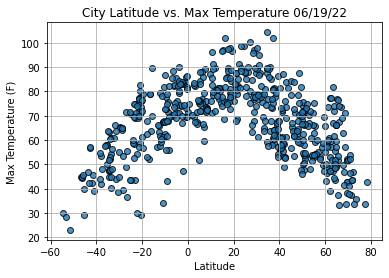

In [108]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

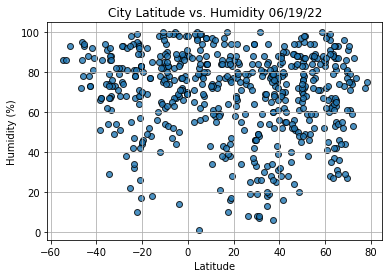

In [109]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

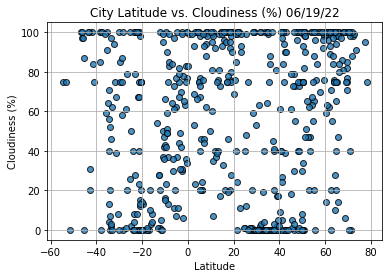

In [110]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

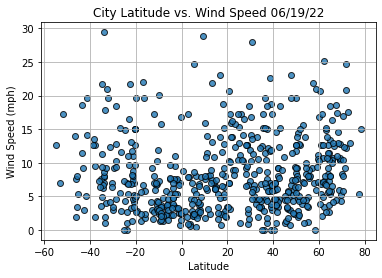

In [111]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [112]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [113]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-06-19 05:33:24
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    74.71
Humidity                       67
Cloudiness                     79
Wind Speed                    9.6
Name: 13, dtype: object

In [114]:
city_data_df['Lat'] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
554    False
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [115]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Talnakh,RU,2022-06-19 05:33:20,69.4865,88.3972,52.21,27,77,4.27
2,San Patricio,US,2022-06-19 05:33:20,28.0170,-97.5169,84.88,84,0,8.25
3,Khatanga,RU,2022-06-19 05:33:21,71.9667,102.5000,47.05,53,98,12.12
9,Djibo,BF,2022-06-19 05:33:23,14.1022,-1.6306,81.27,59,73,6.96
10,Cherskiy,RU,2022-06-19 05:33:23,68.7500,161.3000,57.25,44,6,5.88


In [116]:
%matplotlib inline

In [117]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# southern_hemi_df.head()

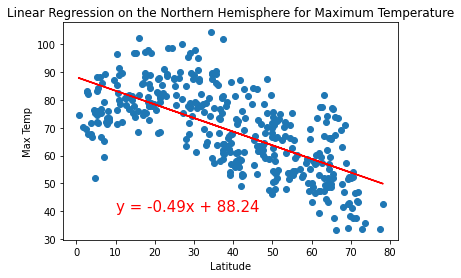

In [135]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Linear Regression on the Northern Hemisphere for Maximum Temperature"
text_coordinates = (10,40)
y_label = "Max Temp"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()


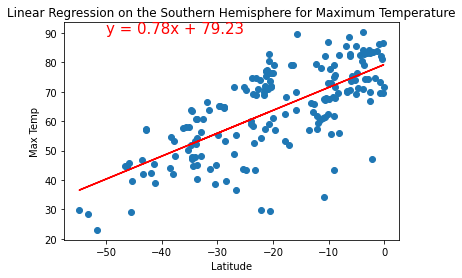

In [138]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Linear Regression on the Southern Hemisphere for Maximum Temperature"
text_coordinates = (-50,90)
y_label = "Max Temp"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()


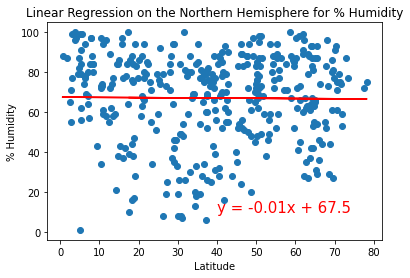

In [139]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Linear Regression on the Northern Hemisphere for % Humidity"
text_coordinates = (40,10)
y_label = "% Humidity"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()


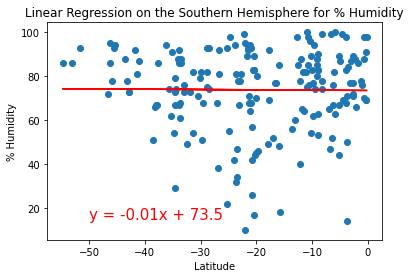

In [140]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Linear Regression on the Southern Hemisphere for % Humidity"
text_coordinates = (-50,15)
y_label = "% Humidity"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()


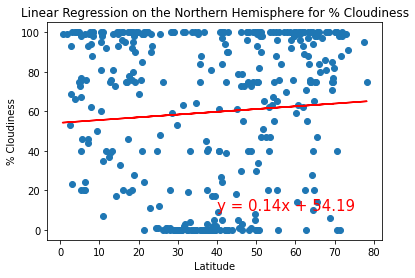

In [141]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Linear Regression on the Northern Hemisphere for % Cloudiness"
text_coordinates = (40,10)
y_label = "% Cloudiness"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()


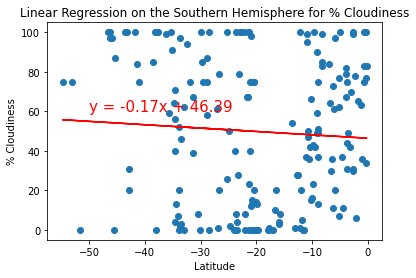

In [142]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Linear Regression on the Southern Hemisphere for % Cloudiness"
text_coordinates = (-50,60)
y_label = "% Cloudiness"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()

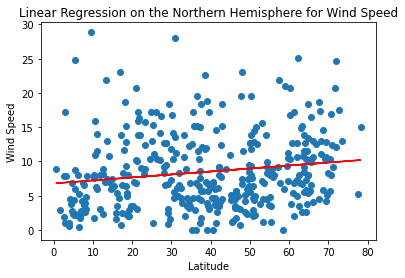

In [143]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Linear Regression on the Northern Hemisphere for Wind Speed"
text_coordinates = (40,35)
y_label = "Wind Speed"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()

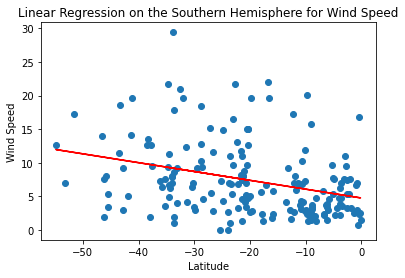

In [144]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Linear Regression on the Southern Hemisphere for Wind Speed"
text_coordinates = (-50,35)
y_label = "Wind Speed"


# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    
regress_values = x_values * slope + intercept

# Get the equation of the line.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()